# 서울시 청소년 정신건강 분석

In [34]:
import numpy as np
import pandas as pd

## 서울시 청소년들의 스트레스 데이터를 읽어보자

In [35]:
# 엑셀파일을 읽기위해서는 내부적으로 xlrd 모듈이 설치되어 있어야 한다.
pd.read_excel("../data/teenage_mental.xls")

기간  구분  스트레스 인지율 스트레스 인지율.1 스트레스 인지율.2 우울감 경험률 우울감 경험률.1 우울감 경험률.2  \
0    기간  구분        전체        남학생        여학생      전체       남학생       여학생   
1  2018   구분     42.7       34.5       51.5    29.6      24.2      35.4   

  자살 생각률 자살 생각률.1 자살 생각률.2  
0     전체      남학생      여학생  
1   15.4     11.8     19.2

In [36]:
pd.read_excel("../data/teenage_mental.xls", header=1)

기간 구분     전체   남학생   여학생  전체.1  남학생.1  여학생.1  전체.2  남학생.2  여학생.2
0  2018  구분  42.7  34.5  51.5  29.6   24.2   35.4  15.4   11.8   19.2

In [37]:
pd.read_excel("../data/teenage_mental.xls", header=1, usecols="C:K")

전체   남학생   여학생  전체.1  남학생.1  여학생.1  전체.2  남학생.2  여학생.2
0  42.7  34.5  51.5  29.6   24.2   35.4  15.4   11.8   19.2

In [38]:
col_names = ['스트레스', '스트레스남학생', '스트레스여학생', '우울감경험률', 
             '우울남학생', '우울여학생','자살생각율', '자살남학생', '자살여학생']

pd.read_excel("../data/teenage_mental.xls", header=1, 
              usecols="C:K", names=col_names)

스트레스  스트레스남학생  스트레스여학생  우울감경험률  우울남학생  우울여학생  자살생각율  자살남학생  자살여학생
0  42.7     34.5     51.5    29.6   24.2   35.4   15.4   11.8   19.2

In [39]:
raw_data = pd.read_excel("../data/teenage_mental.xls", 
                         header=1, 
                         usecols="C:K", 
                         names=col_names)
raw_data

스트레스  스트레스남학생  스트레스여학생  우울감경험률  우울남학생  우울여학생  자살생각율  자살남학생  자살여학생
0  42.7     34.5     51.5    29.6   24.2   35.4   15.4   11.8   19.2

In [40]:
raw_data.loc[1] = 100 - raw_data.loc[0]
raw_data

스트레스  스트레스남학생  스트레스여학생  우울감경험률  우울남학생  우울여학생  자살생각율  자살남학생  자살여학생
0  42.7     34.5     51.5    29.6   24.2   35.4   15.4   11.8   19.2
1  57.3     65.5     48.5    70.4   75.8   64.6   84.6   88.2   80.8

In [41]:
raw_data['응답'] = ['그렇다', '아니다']
raw_data

스트레스  스트레스남학생  스트레스여학생  우울감경험률  우울남학생  우울여학생  자살생각율  자살남학생  자살여학생   응답
0  42.7     34.5     51.5    29.6   24.2   35.4   15.4   11.8   19.2  그렇다
1  57.3     65.5     48.5    70.4   75.8   64.6   84.6   88.2   80.8  아니다

In [42]:
# set_index() : 인덱스를 다른 컬럼으로 교체
# drop = True : 인덱스를 해제하고 남은 데이터를 컬럼으로 사용할 것인지 여부
# inplace= True: DataFrame의 내용을 갱신할 것인지 여부

raw_data.set_index('응답', drop=True, inplace=True)
raw_data

스트레스  스트레스남학생  스트레스여학생  우울감경험률  우울남학생  우울여학생  자살생각율  자살남학생  자살여학생
응답                                                                    
그렇다  42.7     34.5     51.5    29.6   24.2   35.4   15.4   11.8   19.2
아니다  57.3     65.5     48.5    70.4   75.8   64.6   84.6   88.2   80.8

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

#f_path = "/Library/Fonts/AppleGothic.ttf"
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [47]:
raw_data['스트레스']

응답
그렇다    42.7
아니다    57.3
Name: 스트레스, dtype: float64

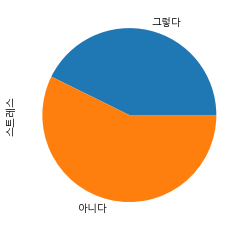

In [44]:
raw_data['스트레스'].plot.pie()

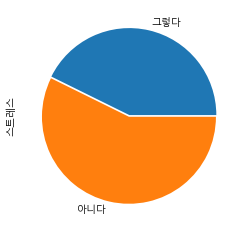

In [45]:
raw_data['스트레스'].plot.pie(explode=[0,0.02]); 

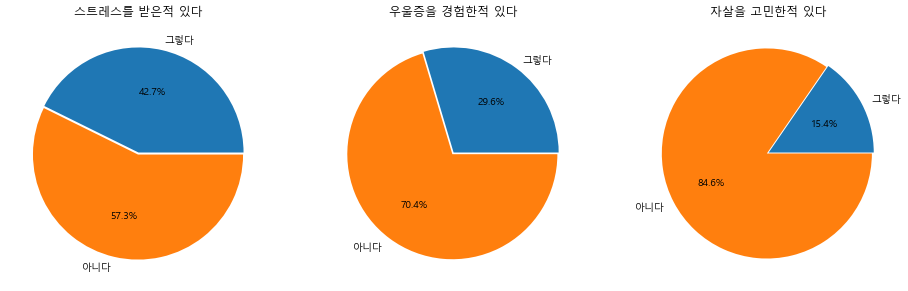

In [46]:
# subplots : 1행 3열로 plot을 배치, figure와 axes 객체를 반환
# figsize : 전체 그림의 크기
f, ax = plt.subplots(1,3, figsize=(16,8))

raw_data['스트레스'].plot.pie(explode=[0,0.02], ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('스트레스를 받은적 있다')
ax[0].set_ylabel('')

raw_data['우울감경험률'].plot.pie(explode=[0,0.02], ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('우울증을 경험한적 있다')
ax[1].set_ylabel('')

raw_data['자살생각율'].plot.pie(explode=[0,0.02], ax=ax[2], autopct='%1.1f%%')
ax[2].set_title('자살을 고민한적 있다')
ax[2].set_ylabel('')

plt.show()